In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sstats
from glob import glob
import numpy as np

In [2]:
example_data = pd.read_csv('ssrt_metrics/indiv_guesses.csv', index_col=0)
example_data.columns = example_data.columns.str.replace('SSRT_', '')
melt_df = pd.melt(example_data, id_vars=['SSD'], value_vars=['SSRT','w_guesses','w_graded'], var_name = 'assumed_go_dist', value_name='SSRT')

FileNotFoundError: [Errno 2] File b'ssrt_metrics/indiv_guesses.csv' does not exist: b'ssrt_metrics/indiv_guesses.csv'

In [3]:
example_data

NameError: name 'example_data' is not defined

In [4]:
_ = sns.lineplot(x='SSD', y='SSRT', hue='assumed_go_dist', data=melt_df)

NameError: name 'melt_df' is not defined

In [5]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in [i for i in glob('ssrt_metrics/*.csv') if 'linear' not in i]:
    title = file.split('indiv_')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard', 'w_guesses': 'guesses', 'w_graded': 'graded_mu_go_log'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard','guesses','graded_mu_go_log'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    
    _ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', data=melt_df)
    
    plt.title(title)
    plt.show()
    plt.close()
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

KeyError: "The following 'value_vars' are not present in the DataFrame: ['graded_mu_go_log', 'guesses']"

# organize ssrt metric data

In [10]:
full_metric_df = pd.DataFrame()

full_melt = pd.DataFrame()

for file in [i for i in glob('ssrt_metrics/*.csv') if 'linear' not in i]:
    title = file.split('/')[-1].replace('.csv', '')
    data =  pd.read_csv(file, index_col=0)
    data.columns = data.columns.str.replace('SSRT_', '')
    data = data.rename(columns={'SSRT': 'standard'})
    melt_df = pd.melt(data, id_vars=['SSD'], value_vars=['standard'], var_name = 'assumed distribution', value_name='SSRT')
    melt_df['underlying distribution'] = title
    full_melt = pd.concat([full_melt, melt_df], 0)
    
    # for inhibition function
    data['underlying distribution'] = title
    full_metric_df = pd.concat([full_metric_df, data], 0)
#     curr_series = data.loc[:,['mean_SSD', 'p_respond']].set_index('mean_SSD').add_prefix(title+'_')
#     p_respond_df = pd.concat([p_respond_df, curr_series], 1)

In [11]:
full_metric_df

,standard,mean_SSD,p_respond,max_RT,mean_go_RT,mean_stopfail_RT,omission_count,omission_rate,go_acc,stopfail_acc,SSD,underlying distribution
0,236.0,0.0,0.2729,2521.0,381.095500,229.345089,0,0.0000,NaN,NaN,0.0,guesses
1,223.0,50.0,0.3782,2521.0,381.095500,242.058903,0,0.0000,NaN,NaN,50.0,guesses
2,224.0,100.0,0.4966,2521.0,381.095500,252.475529,0,0.0000,NaN,NaN,100.0,guesses
3,224.0,150.0,0.6006,2521.0,381.095500,269.227393,0,0.0000,NaN,NaN,150.0,guesses
4,223.0,200.0,0.6833,2521.0,381.095500,279.582716,0,0.0000,NaN,NaN,200.0,guesses
5,226.0,250.0,0.7511,2521.0,381.095500,293.606045,0,0.0000,NaN,NaN,250.0,guesses
6,229.0,300.0,0.8061,2521.0,381.095500,307.024555,0,0.0000,NaN,NaN,300.0,guesses
7,230.0,350.0,0.8483,2521.0,381.095500,317.249226,0,0.0000,NaN,NaN,350.0,guesses
8,231.0,400.0,0.8810,2521.0,381.095500,323.354054,0,0.0000,NaN,NaN,400.0,guesses
9,206.0,450.0,0.8987,2521.0,381.095500,330.817232,0,0.0000,NaN,NaN,450.0,guesses


# SSRT by SSD

In [12]:
# fig,ax = plt.subplots(1,1, figsize=(14, 8))
# keep_idx = ((full_melt['assumed distribution'] == 'standard') | (full_melt['assumed distribution'] == full_melt['underlying distribution'])) & (full_melt['SSD'] <= 650)
# _ = sns.lineplot(x='SSD', y='SSRT', hue='assumed distribution', style='underlying distribution', data=full_melt[keep_idx], palette=['k', '#1f77b4', '#ff7f0e'], linewidth=3)
# plt.savefig('figures/SSRT_by_SSD_supplement.pdf')


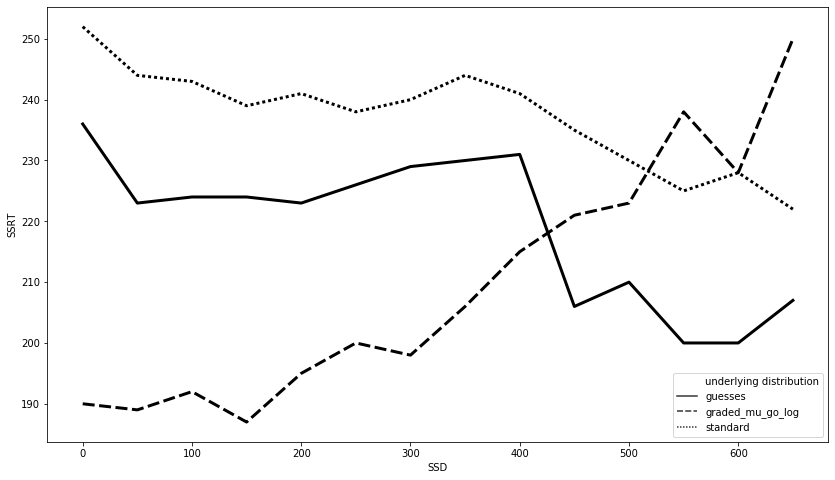

In [13]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='SSRT', color='k', style='underlying distribution', data=full_melt[(full_melt['assumed distribution'] == 'standard') & (full_melt['SSD'] <= 650)], linewidth=3)
plt.savefig('figures/SSRT_by_SSD.pdf')

# Inhibition Function

In [14]:
abcd_inhib_func = pd.read_csv('abcd_data/abcd_inhib_func.csv')

In [15]:
inhib_func_df = pd.concat([full_metric_df[['SSD', 'p_respond', 'underlying distribution']], abcd_inhib_func], 0)

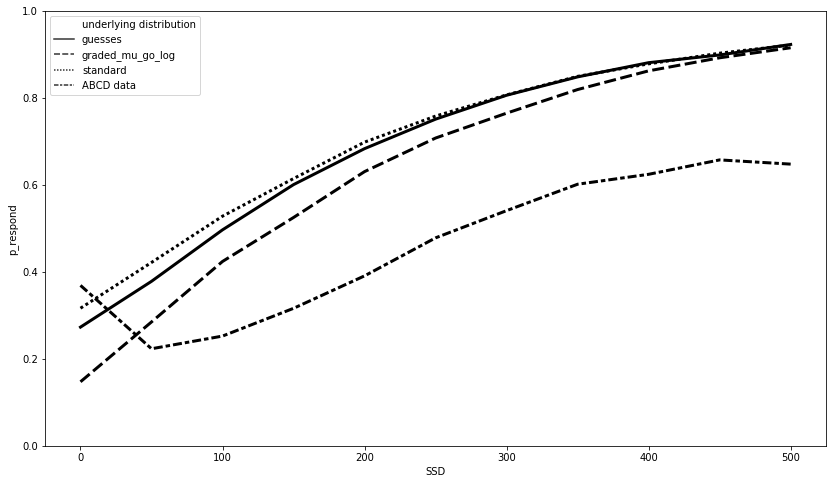

In [19]:
fig,ax = plt.subplots(1,1, figsize=(14, 8))
_ = sns.lineplot(x='SSD', y='p_respond', color='k', style='underlying distribution', data=inhib_func_df.query('SSD <= 500'), linewidth=3)
plt.ylim([0,1])
plt.savefig('figures/inhibition_function.pdf')

In [18]:
inhib_func_df.query('SSD <= 500')

,SSD,p_respond,underlying distribution
0,0.0,0.272900,guesses
1,50.0,0.378200,guesses
2,100.0,0.496600,guesses
3,150.0,0.600600,guesses
4,200.0,0.683300,guesses
5,250.0,0.751100,guesses
6,300.0,0.806100,guesses
7,350.0,0.848300,guesses
8,400.0,0.881000,guesses
9,450.0,0.898700,guesses


# Individual Differences

In [ ]:
ABCD_SSD_dists = pd.read_csv('abcd_data/SSD_dist_by_subj.csv')
ABCD_SSD_dists

In [ ]:
indiv_SSRTs = pd.DataFrame()
for file in [i for i in glob('ssrt_metrics/indiv_*.csv') if 'linear' not in i]:
    data =  pd.read_csv(file, index_col=0)
    
#     if 'graded' in file:
#         data.loc[data.SSD==0, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']] = data.loc[data.SSD==50.0, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']].values
#     else:
#         data.loc[data.SSD==0, 'SSRT_w_graded'] = data.loc[data.SSD==50.0, 'SSRT_w_graded'].values
    
    gen_str = file.split('indiv_')[-1].replace('.csv', '')
    indiv_ssrt_df = pd.DataFrame(np.nan, index=ABCD_SSD_dists.NARGUID.unique(), columns=['vanilla', 'w_guesses', 'w_graded'])
    for sub in ABCD_SSD_dists.NARGUID.unique():
        curr_sub = ABCD_SSD_dists.query("NARGUID=='%s'" % sub)
        indiv_ssrt_df.loc[sub, :] = [0, 0, 0]
        for SSD in curr_sub.SSDDur:
            ssd_SSRTs = data.loc[data.SSD==SSD, ['SSRT', 'SSRT_w_guesses', 'SSRT_w_graded']].values[0]
            weight = curr_sub.loc[curr_sub.SSDDur==SSD, 'proportion'].values
            indiv_ssrt_df.loc[sub, :] +=  ssd_SSRTs * weight
    indiv_SSRTs = pd.concat([indiv_SSRTs, indiv_ssrt_df.add_prefix('gen-%s_SSRT-' % gen_str)], 1)

In [ ]:
indiv_SSRTs.to_csv('outputs/ABCD_weighted_SSRTs.csv')
indiv_SSRTs

In [ ]:
indiv_SSRTs.corr().to_csv('outputs/ABCD_weighted_SSRTs_corr.csv')
indiv_SSRTs.corr()

In [ ]:
indiv_SSRTs_rank = pd.DataFrame()
for col in indiv_SSRTs.columns:
    indiv_SSRTs_rank[col] = indiv_SSRTs[col].rank()
indiv_SSRTs_rank.corr().to_csv('outputs/ABCD_weighted_SSRTs_rank-corr.csv')
indiv_SSRTs_rank.corr()

In [ ]:
indiv_SSRTs_rank.filter(regex='SSRT-vanilla').corr()